# 1. 서비스 기획

## 메뉴판 번역

여행을 많이 다니는 저에게 있어서 새로운 나라의 새로운 음식을 먹는 것은 큰 즐거움입니다.  
다만 세계 각국의 언어를 다 읽을 줄 모르는 만큼 언어의 장벽이 메뉴 선정의 큰 어려움 중 하나입니다.  
일일히 검색해 볼 수도 있지만 시간이 많이 걸리는 만큼 바로바로 메뉴판을 번역해 줄 수 있는 서비스가 있다면 좋을 것입니다.  
이미 존재하는 서비스이지만 이를 기반으로 한 번 프로젝트를 고민해 보며 진행하고자 합니다.  

## 메뉴판 번역에서 OCR의 필요성
메뉴판 번역 서비스에서 OCR의 역할은 중요합니다.  
세계 각국의 언어로 이루어진 메뉴판은 문자도 각양각색이고, 글씨체와 메뉴의 배치도 제각각입니다.  
이러한 메뉴판을 인식하고 번역하기 위해서는 뛰어난 수준의 OCR이 필요함을 두말할 필요가 없습니다.  

***

# 2. OCR 모델 평가기준

### 메뉴판에 등록된 메뉴들 중에서 얼마나 많은 메뉴를 정확히 인식해 냈는지를 기준으로 OCR의 성능을 평가하기로 합니다.

***

# 3. 모델별 인식률 평가 진행

In [37]:
import os
import matplotlib.pyplot as plt
import cv2
import keras_ocr

import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as pl

In [2]:
image_path = os.getenv('HOME')+ '/aiffel/exp18/images'
file_list = sorted(os.listdir(image_path))
file_list

['image1.jpg',
 'image2.jpg',
 'image3.jpg',
 'image4.jpg',
 'image5.jpg',
 'image6.jpg',
 'image7.jpg',
 'image8.jpg']

# 3_1. keras-ocr

In [3]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [4]:
images = [keras_ocr.tools.read(os.path.join(image_path, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(image_path, file)]) for file in file_list]

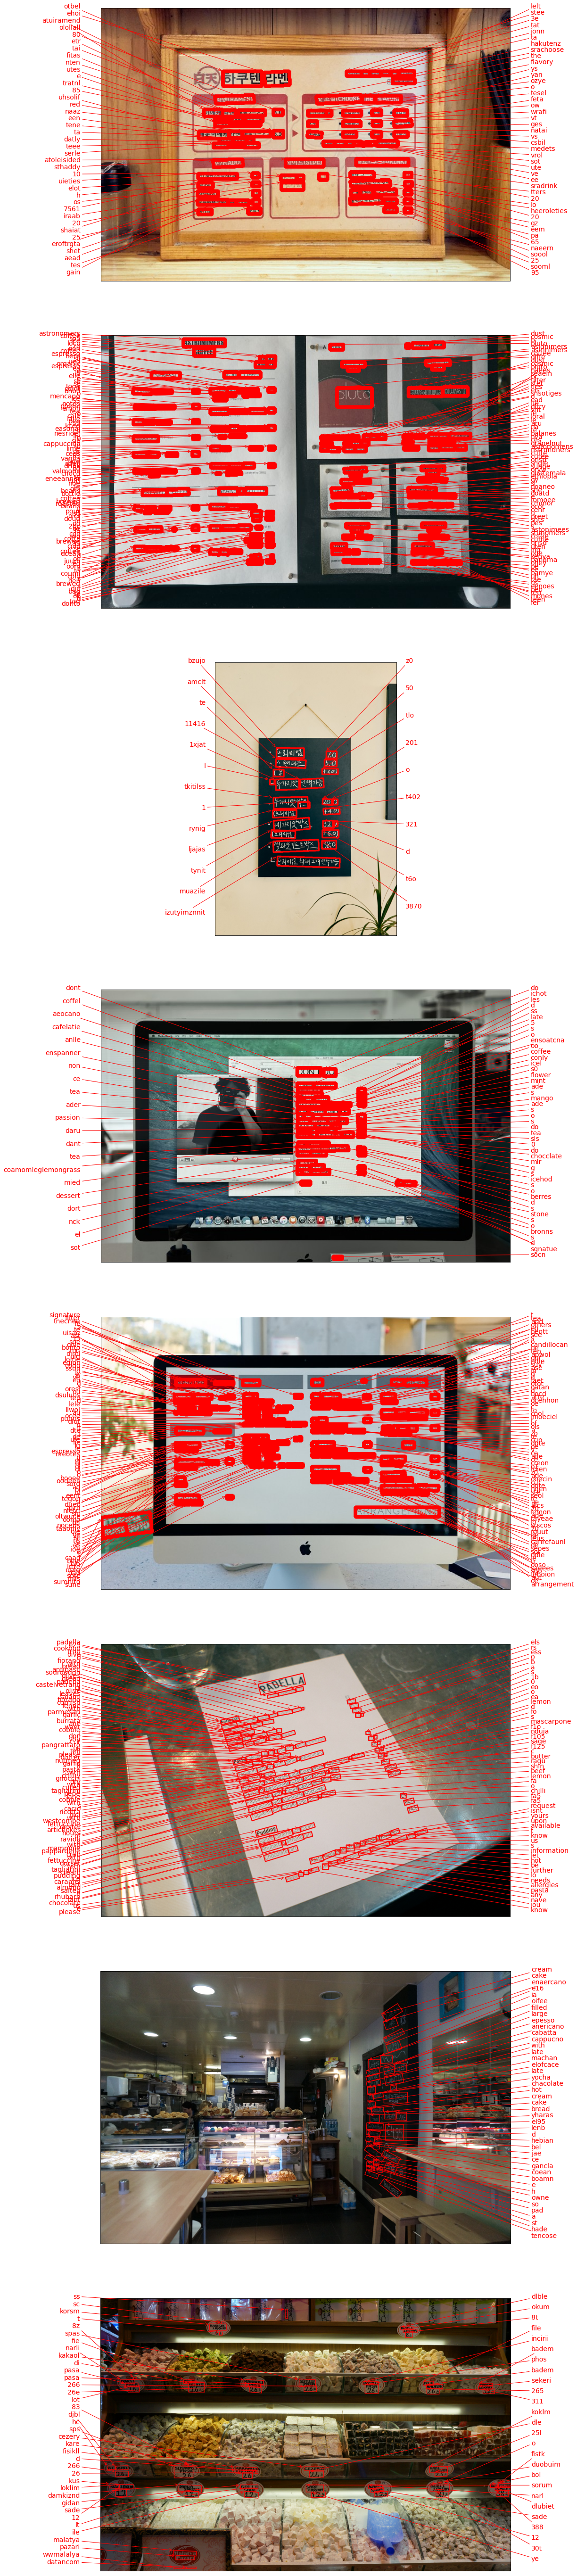

In [7]:
fig, axs = plt.subplots(nrows=len(images), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 3_2. 테서랙트

In [38]:
def crop_word_regions_kor(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [39]:
def crop_word_regions_eng(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [40]:
def recognize_images_kor(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(  #검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나온다.
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [41]:
def recognize_images_eng(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(  #검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나온다.
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [42]:
work_dir = os.getenv('HOME')+'/aiffel/exp18/image1'
img_file_path = work_dir + '/image.jpg'

In [43]:
cropped_image_path_list = crop_word_regions_kor(img_file_path, work_dir)

/aiffel/aiffel/exp18/image1/0000.png
/aiffel/aiffel/exp18/image1/0001.png
/aiffel/aiffel/exp18/image1/0002.png
/aiffel/aiffel/exp18/image1/0003.png
/aiffel/aiffel/exp18/image1/0004.png
/aiffel/aiffel/exp18/image1/0005.png
/aiffel/aiffel/exp18/image1/0006.png
/aiffel/aiffel/exp18/image1/0007.png
/aiffel/aiffel/exp18/image1/0008.png
/aiffel/aiffel/exp18/image1/0009.png
/aiffel/aiffel/exp18/image1/0010.png
/aiffel/aiffel/exp18/image1/0011.png
/aiffel/aiffel/exp18/image1/0012.png
/aiffel/aiffel/exp18/image1/0013.png
/aiffel/aiffel/exp18/image1/0014.png
/aiffel/aiffel/exp18/image1/0015.png
/aiffel/aiffel/exp18/image1/0016.png
/aiffel/aiffel/exp18/image1/0017.png
/aiffel/aiffel/exp18/image1/0018.png
/aiffel/aiffel/exp18/image1/0019.png
/aiffel/aiffel/exp18/image1/0020.png
/aiffel/aiffel/exp18/image1/0021.png
/aiffel/aiffel/exp18/image1/0022.png
/aiffel/aiffel/exp18/image1/0023.png
/aiffel/aiffel/exp18/image1/0024.png
/aiffel/aiffel/exp18/image1/0025.png
/aiffel/aiffel/exp18/image1/0026.png
/

In [44]:
recognize_images_kor(cropped_image_path_list)

-ㅡ-          .           때 0" "

_ 0 여

| _ 『【ㅋ^

도

하

그

테|

라멘


"은

오는 매슈

바이 0

ㅣ                  _ 호

ㅣ     ㅣ

| | 쪼58 이. …… … | | | 할래배

-

이

에

케

라

메

※-ㄱㄱ>,

0.

: 개 0

~

1)간장

어

0

0 <

탑하게

: 개 0

@ 노돈

@ 시길

기

ㅠㅜ

닫픔수해

딜표한

ㅜ ㆍ 04"

|든도점 다산

개안 가지 ㆍ 네

기변           @ 꼬들하게


보 5

: 개 0

통

보

~

럽게

1 ㅣ | 51 대 | | | 은

ㅣ ㅣ 아 | 이 가개패패패때때 02080" |000쏘

2” 그주라아애하에메우펴        〉        “_ 10." ~


매

우

이

: 개 0

예케

라

때

;은

포

가 … 7



『

31

소도

: 개 0

: 개 0

…

쓰

하게

@ 투

"

티

년 은

기

\ |] 08-ㅜ나주

"알웠이 않으 될

주

?, ,- …^또 0 앨니다 *

“ㅠㅠ!

ｌ

시 ㅣ 665 (620 ㅋㅋ |

그 0 0 0 002790}}0 } 으 은.

으 를  "1

이 |2      "

0 /

제|

라 / 시금치 /파

1 내


할라 "~

< 니

| 금

15장]

)

스 프라이

은 다게 새-

?

때 앞&

：.          ：ｌ

가 0            | | 1”

으으 기         "

|        1 | | |

|          ：


,

차슈{3장}

) 0

"

압

렁백

"

…ㄷ

=]

.…'

모

: 개 0

는 야채

|

암내 추

궤

자 새


지

In [45]:
work_dir = os.getenv('HOME')+'/aiffel/exp18/image2'
img_file_path = work_dir + '/image.jpg'

In [46]:
cropped_image_path_list = crop_word_regions_eng(img_file_path, work_dir)

/aiffel/aiffel/exp18/image2/0000.png
/aiffel/aiffel/exp18/image2/0001.png
/aiffel/aiffel/exp18/image2/0002.png
/aiffel/aiffel/exp18/image2/0003.png
/aiffel/aiffel/exp18/image2/0004.png
/aiffel/aiffel/exp18/image2/0005.png
/aiffel/aiffel/exp18/image2/0006.png
/aiffel/aiffel/exp18/image2/0007.png
/aiffel/aiffel/exp18/image2/0008.png
/aiffel/aiffel/exp18/image2/0009.png
/aiffel/aiffel/exp18/image2/0010.png
/aiffel/aiffel/exp18/image2/0011.png
/aiffel/aiffel/exp18/image2/0012.png


In [47]:
recognize_images_eng(cropped_image_path_list)


;

PUTT

bh

| SS

‘ijat


mi aads

BEAN

:

Seregigs

eT ORLA

s o :

Done


In [48]:
work_dir = os.getenv('HOME')+'/aiffel/exp18/image3'
img_file_path = work_dir + '/image.jpg'

In [49]:
cropped_image_path_list = crop_word_regions_kor(img_file_path, work_dir)

/aiffel/aiffel/exp18/image3/0000.png
/aiffel/aiffel/exp18/image3/0001.png
/aiffel/aiffel/exp18/image3/0002.png
/aiffel/aiffel/exp18/image3/0003.png
/aiffel/aiffel/exp18/image3/0004.png
/aiffel/aiffel/exp18/image3/0005.png
/aiffel/aiffel/exp18/image3/0006.png
/aiffel/aiffel/exp18/image3/0007.png
/aiffel/aiffel/exp18/image3/0008.png
/aiffel/aiffel/exp18/image3/0009.png
/aiffel/aiffel/exp18/image3/0010.png
/aiffel/aiffel/exp18/image3/0011.png
/aiffel/aiffel/exp18/image3/0012.png
/aiffel/aiffel/exp18/image3/0013.png
/aiffel/aiffel/exp18/image3/0014.png
/aiffel/aiffel/exp18/image3/0015.png
/aiffel/aiffel/exp18/image3/0016.png
/aiffel/aiffel/exp18/image3/0017.png
/aiffel/aiffel/exp18/image3/0018.png
/aiffel/aiffel/exp18/image3/0019.png
/aiffel/aiffel/exp18/image3/0020.png
/aiffel/aiffel/exp18/image3/0021.png
/aiffel/aiffel/exp18/image3/0022.png
/aiffel/aiffel/exp18/image3/0023.png
/aiffel/aiffel/exp18/image3/0024.png
/aiffel/aiffel/exp18/image3/0025.png
/aiffel/aiffel/exp18/image3/0026.png
/

In [50]:
recognize_images_kor(cropped_image_path_list)

주

16

는

9

0

기여

베오

아더

그

0022

별

: 102

|

[개

0”

시

|: 해

|

구겨

7

271.

초서

0, 0

다

가

0

살 0 :

         ：

Done


In [51]:
work_dir = os.getenv('HOME')+'/aiffel/exp18/image4'
img_file_path = work_dir + '/image.jpg'

In [52]:
cropped_image_path_list = crop_word_regions_eng(img_file_path, work_dir)

/aiffel/aiffel/exp18/image4/0000.png


In [53]:
recognize_images_eng(cropped_image_path_list)

| aa | i

Done


In [54]:
work_dir = os.getenv('HOME')+'/aiffel/exp18/image5'
img_file_path = work_dir + '/image.jpg'

In [55]:
cropped_image_path_list = crop_word_regions_kor(img_file_path, work_dir)

/aiffel/aiffel/exp18/image5/0000.png


SystemError: tile cannot extend outside image

In [56]:
recognize_images_kor(cropped_image_path_list)

| 새 |

Done


In [57]:
work_dir = os.getenv('HOME')+'/aiffel/exp18/image6
img_file_path = work_dir + '/image.jpg'

SyntaxError: EOL while scanning string literal (<ipython-input-57-e69dfbc8b54d>, line 1)

In [58]:
cropped_image_path_list = crop_word_regions_eng(img_file_path, work_dir)

/aiffel/aiffel/exp18/image5/0000.png


SystemError: tile cannot extend outside image

In [ ]:
recognize_images_eng(cropped_image_path_list)

In [59]:
work_dir = os.getenv('HOME')+'/aiffel/exp18/image7'
img_file_path = work_dir + '/image.jpg'

In [60]:
cropped_image_path_list = crop_word_regions_eng(img_file_path, work_dir)

TypeError: Unsupported image format/type

In [61]:
recognize_images_eng(cropped_image_path_list)

| aa | i

Done


In [62]:
work_dir = os.getenv('HOME')+'/aiffel/exp18/image8'
img_file_path = work_dir + '/image.jpg'

In [63]:
cropped_image_path_list = crop_word_regions_eng(img_file_path, work_dir)

TypeError: Unsupported image format/type

In [64]:
recognize_images_eng(cropped_image_path_list)

| aa | i

Done


***

# 4. 평가 결과 및 결론

2019년 DEVIEW에서 네이버가 발표한 OCR 성능 측정 방법에 관한 발표(https://tv.naver.com/v/11210453)까지 봐가면서 성능평가에 대해 고민을 하다가 시작한 과제였지만 keras-ocr과 tesseract의 성능은 성능 측정을 할 수준에도 못 미치는 결과를 부여주었습니다.  
아마 예제에서 사용했던 구글의 Cloud Vision을 사용한다면 꽤나 좋은 성능을 내겠지만 이미 keras-ocr과 tesseract의 결과물이 이런 이상 비교할 가치가 없는 만큼 과제 자체의 의의가 많이 희석되어 안타깝습니다. 
  
약간 고찰을 덧붙이자면 keras-ocr의 경우엔 적어도 무엇이 단어인지는 잘 검출해 낸 것으로 보입니다.  
일부러 기울어진 사진 같은 것을 넣어봤는데도 단어를 잘 식별했습니다.  
다만 무엇이 단어인지는 잘 검출했지만 정확한 단어를 이끌어내지는 못 하는 모습이었습니다.  
또한, 영어밖에 판별하지 못 하는 것도 아쉬웠습니다.  
tesseract의 경우 조금만 사진이 틀어져 있거나, 글씨체를 못 알아보거나, 사진 인식이 어려우면 아예 사진에서 무엇이 단어인지 조차 검출해 내지 못 하고 있는 것을 볼 수 있었습니다. (단어를 인식을 하지 못 한 사진에 대한 에러들의 참혹한 현장)  